<a href="https://colab.research.google.com/github/cmvigneswaranaero-gif/ML-DL/blob/main/Decision_Trees_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy calculation

In [19]:
#p1=0.5 and p2=0.5
import math
entropy=-0.5*math.log2(0.5) -0.5*math.log2(0.5)
print("Entropy for 50%-50% case ==>", entropy)

Entropy for 50%-50% case ==> 1.0


In [20]:
entropy=-0.0001*math.log2(0.0001) -0.9999*math.log2(0.9999)
print("Entropy for 0%-100% case ==>", entropy)

Entropy for 0%-100% case ==> 0.0014730335283281598


In [21]:
import math
entropy=-0.45*math.log2(0.45) -0.55*math.log2(0.55)
print("Entropy for 45%-55% case ==>", entropy)

entropy=-0.05*math.log2(0.05) -0.95*math.log2(0.95)
print("Entropy for 5%-95% case ==>", entropy)

Entropy for 45%-55% case ==> 0.9927744539878083
Entropy for 5%-95% case ==> 0.28639695711595625


# Data Importing

In [22]:
#Import Data
import pandas as pd

Ecom_data = pd.read_csv("https://raw.githubusercontent.com/cmvigneswaranaero-gif/ML-DL/refs/heads/main/decision_tree_Ecom_Cust_Survey_v1.csv")

Ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11805 entries, 0 to 11804
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cust_num              11805 non-null  int64 
 1   Region                11805 non-null  int64 
 2   Age                   11805 non-null  int64 
 3   Order_Quantity        11805 non-null  int64 
 4   Customer_Type         11805 non-null  object
 5   Overall_Satisfaction  11805 non-null  object
dtypes: int64(4), object(2)
memory usage: 553.5+ KB


In [ ]:
Ecom_data['Overall_Satisfaction'].value_counts()

,count
Overall_Satisfaction,
Dis Satisfied,6408
Satisfied,5397


# Convert Non-numerical Data into numerical

In [25]:
Ecom_data['Customer_Type_num'] = Ecom_data['Customer_Type'].map({'Prime': 1, 'Non_Prime': 0}).astype(int)
print(Ecom_data['Customer_Type'].value_counts())
print(Ecom_data['Customer_Type_num'].value_counts())

Customer_Type
Prime        6804
Non_Prime    5001
Name: count, dtype: int64
Customer_Type_num
1    6804
0    5001
Name: count, dtype: int64


In [24]:
Ecom_data['Overall_Satisfaction_num'] = Ecom_data['Overall_Satisfaction'].map( {'Dis Satisfied': 0, 'Satisfied': 1} ).astype(int).astype(int)
print(Ecom_data['Overall_Satisfaction'].value_counts())
print(Ecom_data['Overall_Satisfaction_num'].value_counts())

Overall_Satisfaction
Dis Satisfied    6408
Satisfied        5397
Name: count, dtype: int64
Overall_Satisfaction_num
0    6408
1    5397
Name: count, dtype: int64


In [ ]:
Ecom_data.columns

# Decision Tree Model Building

In [26]:
from sklearn import tree

features= ['Region', 'Age', 'Order_Quantity',  'Customer_Type_num']
print("Features",features)

X = Ecom_data[features]
print("X shape", X.shape)
y = Ecom_data['Overall_Satisfaction']
print("Y shape", y.shape)

Features ['Region', 'Age', 'Order_Quantity', 'Customer_Type_num']
X shape (11805, 4)
Y shape (11805,)


|--- Order_Quantity <= 40.50
|   |--- Age <= 29.50
|   |   |--- class: Satisfied
|   |--- Age >  29.50
|   |   |--- class: Dis Satisfied
|--- Order_Quantity >  40.50
|   |--- Age <= 20.50
|   |   |--- class: Satisfied
|   |--- Age >  20.50
|   |   |--- class: Satisfied



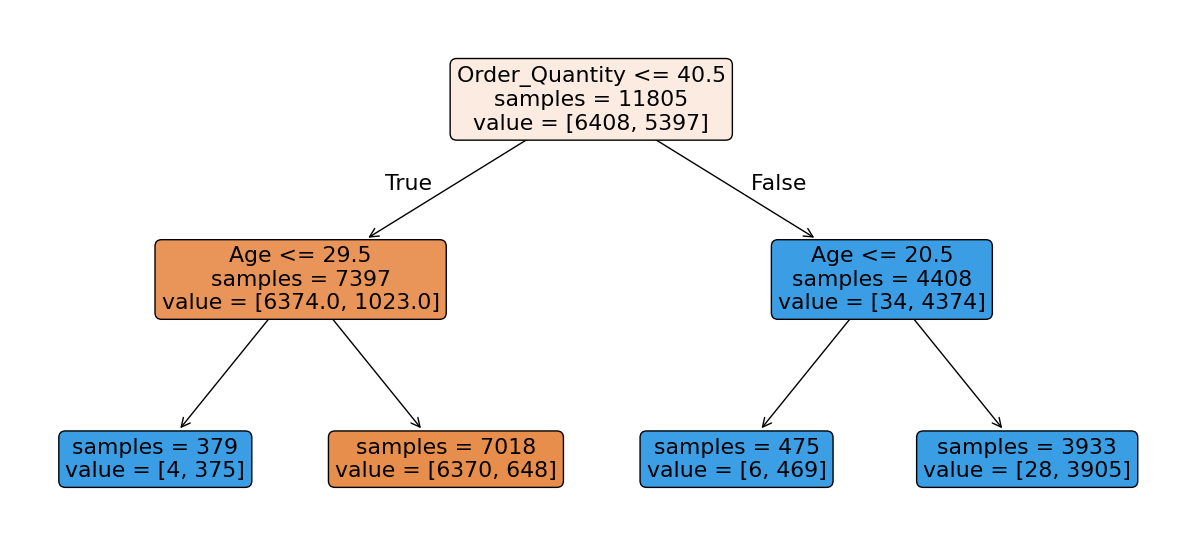

In [49]:
#Building Tree Model


##Plotting the trees
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))


In [ ]:
# this code for ploting tree with only dtree command
DTree = tree.DecisionTreeClassifier(max_depth=2)
DTree.fit(X, y)
##Plotting the trees

plot_tree(DTree)

In [ ]:
# this code for plooting tre without gini
DTree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
DTree.fit(X, y)
##Plotting the trees

plot_tree(DTree)

# Tree Validation

In [58]:
##########Tree Validation
#Tree Validation
predict1 = DTree.predict(X)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y, predict1)
print (cm)


total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)


# instead of doing this in manual way, we can predict directly accuracy score
print("\nTraining Accuracy:", accuracy_score(y, predict1))

[[6370   38]
 [ 648 4749]]
0.9418890300720034

Training Accuracy: 0.9418890300720034


In [60]:
# cant belive this validation so train and test data
#if train and test accuracy are same ..good..or if train more and test less
# overfiting
# --------------------------
# 1. Train-Test Split (80%-20%)
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# --------------------------
# 2. Build & Train Decision Tree
# --------------------------
DTree = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
DTree.fit(X_train, y_train)

# --------------------------
# 3. Predictions for Train & Test
# --------------------------
y_train_pred = DTree.predict(X_train)
y_test_pred = DTree.predict(X_test)

# --------------------------
# 4. Confusion Matrix for Training Data
# --------------------------
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nTraining Confusion Matrix:\n", cm_train)

# --------------------------
# 5. Confusion Matrix for Testing Data
# --------------------------
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nTesting Confusion Matrix:\n", cm_test)

# --------------------------
# 6. Accuracy & Reports
# --------------------------
print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))




Training Confusion Matrix:
 [[5096   35]
 [ 526 3787]]

Testing Confusion Matrix:
 [[1274    3]
 [ 122  962]]

Training Accuracy: 0.9405972045743329
Testing Accuracy: 0.9470563320626854


# The problem of overfitting

In [65]:
# change max depth
# 1. Train-Test Split (80%-20%)
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# --------------------------
# 2. Build & Train Decision Tree
# --------------------------
DTree = tree.DecisionTreeClassifier(max_depth=3000, random_state=42)
DTree.fit(X_train, y_train)

# --------------------------
# 3. Predictions for Train & Test
# --------------------------
y_train_pred = DTree.predict(X_train)
y_test_pred = DTree.predict(X_test)

# --------------------------
# 4. Confusion Matrix for Training Data
# --------------------------
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nTraining Confusion Matrix:\n", cm_train)

# --------------------------
# 5. Confusion Matrix for Testing Data
# --------------------------
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nTesting Confusion Matrix:\n", cm_test)

# --------------------------
# 6. Accuracy & Reports
# --------------------------
print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))


Training Confusion Matrix:
 [[5096   35]
 [ 221 4092]]

Testing Confusion Matrix:
 [[1214   63]
 [  99  985]]

Training Accuracy: 0.9728928420160948
Testing Accuracy: 0.9313850063532402


***example 2 for overfitting***



In [ ]:
#Datasets: Diabetes
#Import both test and training data

train = pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/pima/diabetes_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/pima/diabetes_test.csv")

print(train.sample(5))

     Count_Pregnancies  Glucose_level  BP  SkinThickness_index  Insulin_level  \
312                  4             99  76                   15             51   
595                  0            100  88                   60            110   
485                  2             93  64                   32            160   
492                  1            102  74                    0              0   
322                  1            111  62                   13            182   

      BMI  DiabetesPedigreeFunction  Age  Diabetes_outcome  
312  23.2                     0.223   21                 0  
595  46.8                     0.962   31                 0  
485  38.0                     0.674   23                 1  
492  39.5                     0.293   42                 1  
322  24.0                     0.138   23                 0  


In [ ]:
from sklearn import tree

#Defining Features and lables
features=['Count_Pregnancies', 'Glucose_level', 'BP', 'SkinThickness_index',
          'Insulin_level', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_train = train[features]
y_train = train['Diabetes_outcome']

#X_train

X_test = test[features]
y_test = test['Diabetes_outcome']

In [70]:
#training Tree Model
clf = tree.DecisionTreeClassifier() # this automatically take infinity
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
print("\nTraining Confusion Matrix:\n", cm1)
print("\nTraining Accuracy:", accuracy_score(y_train,predict1))

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print("\nTesting Confusion Matrix:\n", cm2)
print("Testing Accuracy:", accuracy_score(y_test,predict2))


Training Confusion Matrix:
 [[5096   35]
 [ 221 4092]]

Training Accuracy: 0.9728928420160948

Testing Confusion Matrix:
 [[1214   63]
 [  97  987]]
Testing Accuracy: 0.9322321050402372


# Pruning

## max_leaf_nodes - Finetuning

In [71]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 3000)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
print("\nTraining Confusion Matrix:\n", cm1)
print("\nTraining Accuracy:", accuracy_score(y_train,predict1))

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print("\nTesting Confusion Matrix:\n", cm2)
print("Testing Accuracy:", accuracy_score(y_test,predict2))


Training Confusion Matrix:
 [[5096   35]
 [ 221 4092]]

Training Accuracy: 0.9728928420160948

Testing Confusion Matrix:
 [[1214   63]
 [  99  985]]
Testing Accuracy: 0.9313850063532402


In [72]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 30)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
print("\nTraining Confusion Matrix:\n", cm1)
print("\nTraining Accuracy:", accuracy_score(y_train,predict1))

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print("\nTesting Confusion Matrix:\n", cm2)
print("Testing Accuracy:", accuracy_score(y_test,predict2))


Training Confusion Matrix:
 [[4932  199]
 [ 292 4021]]

Training Accuracy: 0.948009318085557

Testing Confusion Matrix:
 [[1240   37]
 [  63 1021]]
Testing Accuracy: 0.9576450656501483


In [73]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 10)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
print("\nTraining Confusion Matrix:\n", cm1)
print("\nTraining Accuracy:", accuracy_score(y_train,predict1))

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print("\nTesting Confusion Matrix:\n", cm2)
print("Testing Accuracy:", accuracy_score(y_test,predict2))


Training Confusion Matrix:
 [[4962  169]
 [ 355 3958]]

Training Accuracy: 0.9445150360016942

Testing Confusion Matrix:
 [[1249   28]
 [  78 1006]]
Testing Accuracy: 0.9551037695891571
